In [49]:
import pandas as pd
import shap
import sklearn
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression

import numpy as np

In [40]:
# a classic housing price dataset
X,y = shap.datasets.adult()
X100 = shap.utils.sample(X, 100)


# a simple linear model
model = sklearn.linear_model.LinearRegression()
model.fit(X, y)

LinearRegression()

In [3]:
print("Model coefficients:\n")
for i in range(X.shape[1]):
    print(X.columns[i], "=", model.coef_[i].round(4))

Model coefficients:

Age = 0.005
Workclass = -0.0038
Education-Num = 0.0455
Marital Status = -0.0102
Occupation = 0.0026
Relationship = 0.0651
Race = 0.013
Sex = 0.0582
Capital Gain = 0.0
Capital Loss = 0.0001
Hours per week = 0.0042
Country = -0.0001


In [4]:
# compute the SHAP values for the linear model
background = shap.maskers.Independent(X, max_samples=1000)
explainer = shap.Explainer(model.predict, background)
shap_values = explainer(X)

# make a standard partial dependence plot
sample_ind = 18

PermutationExplainer explainer: 32562it [09:59, 53.46it/s]                                 


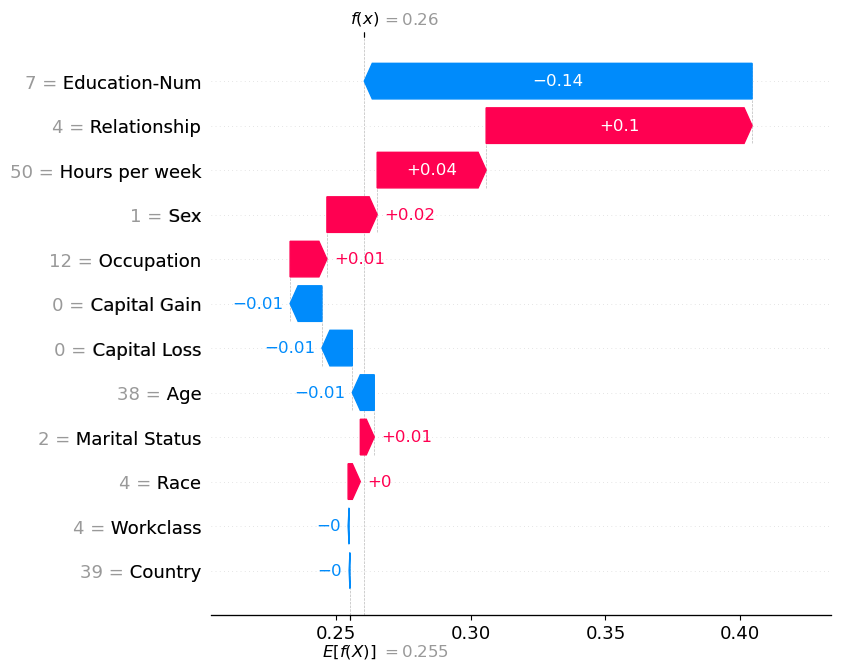

In [5]:

# the waterfall_plot shows how we get from shap_values.base_values to model.predict(X)[sample_ind]
shap.plots.waterfall(shap_values[sample_ind], max_display=14)

In [58]:
ft = pd.read_csv("../data/baseline_augusto/baseline_ED_feat.csv").sort_values("log")
bench = pd.read_csv("../data/baseline_augusto/baseline_ED_bench.csv").sort_values("log")
bench = bench.dropna(axis=1)

ft_ben = pd.merge(ft, bench, on=['log'], how='inner').reset_index(drop=True)
print(ft.shape, bench.shape, ft_ben.shape)
ft_ben.head()

(26, 8) (17, 7) (17, 14)


,log,ratio_unique_traces_per_trace,ratio_most_common_variant,ratio_top_10_variants,epa_normalized_variant_entropy,epa_normalized_sequence_entropy,epa_normalized_sequence_entropy_linear_forgetting,epa_normalized_sequence_entropy_exponential_forgetting,fitness_imf,precision_imf,fscore_imf,size_imf,pnsize_imf,cfc_imf
0,BPIC13cp,0.123067,0.331540,0.840619,0.705383,0.310940,0.286515,0.288383,0.990413,0.947021,0.968231,15,10,9
1,BPIC13inc,0.200026,0.232195,0.794414,0.717846,0.404651,0.391097,0.391625,0.957241,0.716391,0.819486,16,10,8
2,BPIC13op,0.131868,0.217338,0.769231,0.702960,0.276771,0.262094,0.263029,0.851320,0.906565,0.878074,17,10,8
3,BPIC14dc_p,0.048444,0.074944,0.765056,0.470758,0.419266,0.312599,0.326719,0.999833,1.000000,0.999916,606,366,364
4,BPIC14di_p,0.000041,0.787081,0.000000,1.000000,0.044018,0.033322,0.034685,0.999900,1.000000,0.999950,10,4,2


In [65]:
X_cols = ft_ben.columns[1:8]
X_fb = ft_ben[X_cols]
y_fb = ft_ben['fitness_imf'].values

In [66]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(X_fb)
imp_X = imp_mean.transform(X_fb)

model.fit(imp_X, y_fb)

LinearRegression()

In [67]:
print("Model coefficients:\n")
for i in range(X_fb.shape[1]):
    print(X_fb.columns[i], "=", model.coef_[i].round(4))

Model coefficients:

ratio_unique_traces_per_trace = 0.2208
ratio_most_common_variant = 0.1618
ratio_top_10_variants = -0.0527
epa_normalized_variant_entropy = -0.0961
epa_normalized_sequence_entropy = 2.2913
epa_normalized_sequence_entropy_linear_forgetting = 7.673
epa_normalized_sequence_entropy_exponential_forgetting = -10.1256


In [74]:
# compute the SHAP values for the linear model
background = shap.maskers.Independent(X_fb, max_samples=1000)
explainer = shap.Explainer(model.predict, background)
shap_values = explainer(X_fb)

# make a standard partial dependence plot
sample_ind = 0

/Users/andreamaldonado/miniconda3/envs/shampu/lib/python3.9/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/Users/andreamaldonado/miniconda3/envs/shampu/lib/python3.9/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/Users/andreamaldonado/miniconda3/envs/shampu/lib/python3.9/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/Users/andreamaldonado/miniconda3/envs/shampu/lib/python3.9/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/Users/andreamaldonado/miniconda3/envs/shampu/lib/python3.9/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


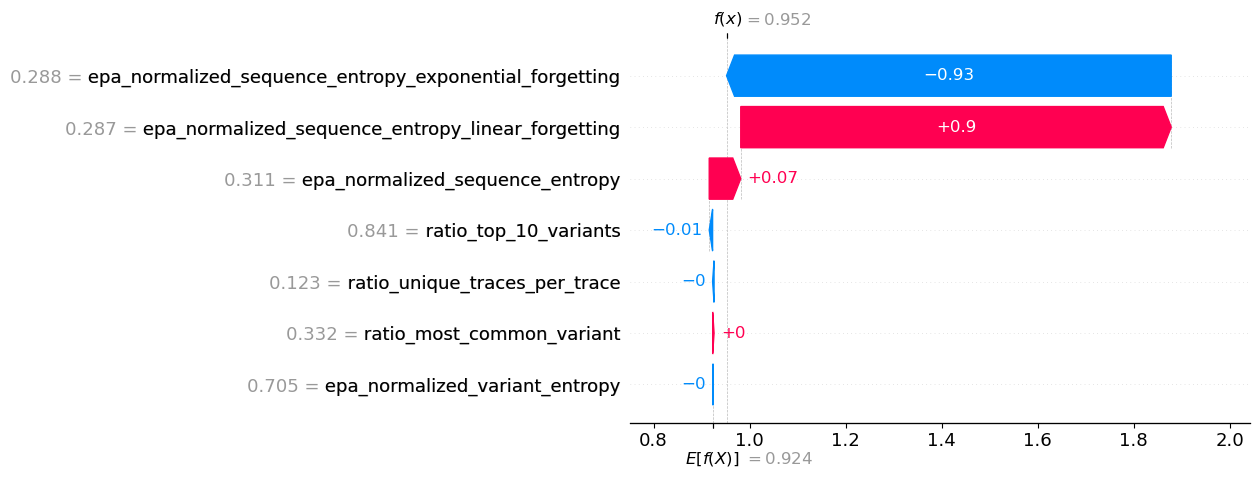

In [76]:
shap.plots.waterfall(shap_values[sample_ind], max_display=14)

## Heatmaps and SHAP plots


In [1]:
import pandas as pd
import shap
import sklearn
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
import xgboost as xgb
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

c:\Users\aniru\anaconda3\envs\gedi\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
ft = pd.read_csv("../data/bpics_feat.csv").sort_values("log")
bench = pd.read_csv("../data/bpics_bench.csv").sort_values("log")
bench = bench.dropna().reset_index(drop=True)

ft_ben = pd.merge(ft, bench, on=['log'], how='inner').reset_index(drop=True)
print(ft.shape, bench.shape, ft_ben.shape)
ft_ben.head()

(34, 178) (11, 36) (11, 213)


,log,n_traces,n_unique_traces,ratio_variants_per_number_of_traces,trace_len_min,trace_len_max,trace_len_mean,trace_len_median,trace_len_mode,trace_len_std,...,pnsize_sm1,cfc_sm1,time_sm1,fitness_imf,precision_imf,fscore_imf,size_imf,pnsize_imf,cfc_imf,time_imf
0,BPIC13cp,1487,183,0.123067,1,35,4.478816,3.0,2,3.170888,...,7.0,5.0,11.71,0.990413,0.947021,0.968231,15.0,10.0,9.0,63.65
1,BPIC13inc,7554,1511,0.200026,1,123,8.675271,6.0,3,7.625071,...,8.0,6.0,45.16,0.957241,0.716391,0.819486,16.0,10.0,8.0,335.02
2,BPIC13op,819,108,0.131868,1,22,2.870574,2.0,2,2.082628,...,7.0,5.0,8.62,0.851320,0.906565,0.878074,17.0,10.0,8.0,5.24
3,BPIC16c_p,226,99,0.438053,1,5,1.278761,1.0,1,0.642995,...,52.0,47.0,13.25,0.892313,0.930178,0.910852,114.0,40.0,36.0,5.22
4,BPIC16wm_p,16653,48,0.002882,1,61,3.966733,3.0,1,4.203692,...,4.0,2.0,54.12,0.999900,1.000000,0.999950,5.0,4.0,2.0,326.61


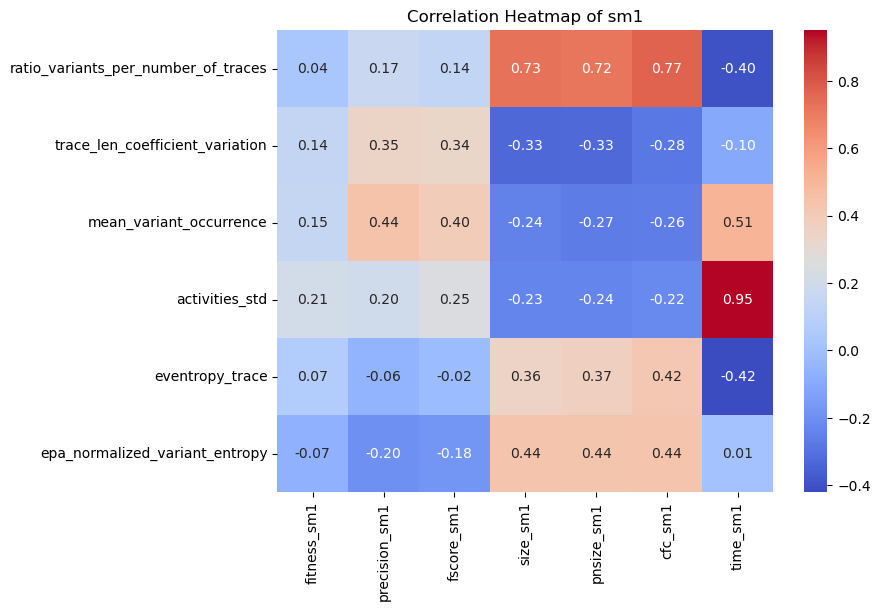

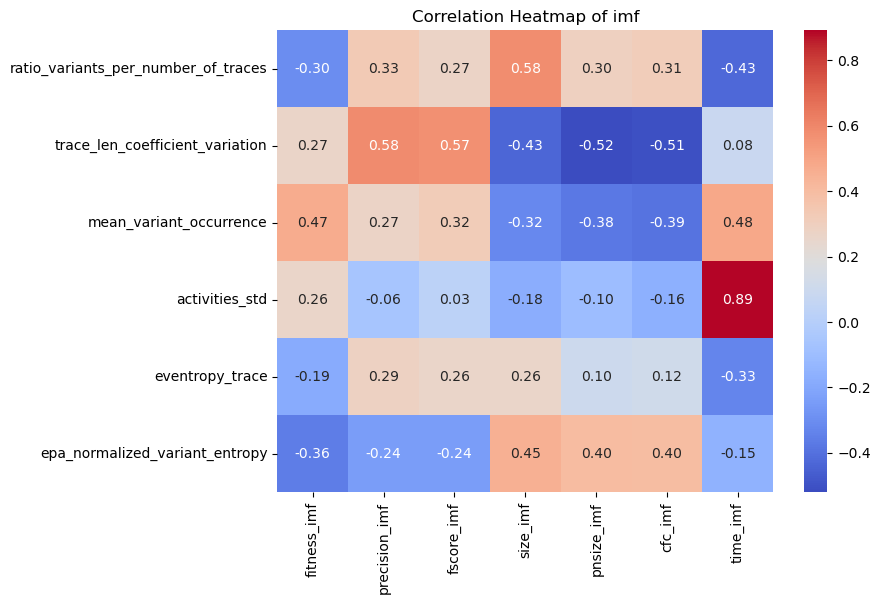

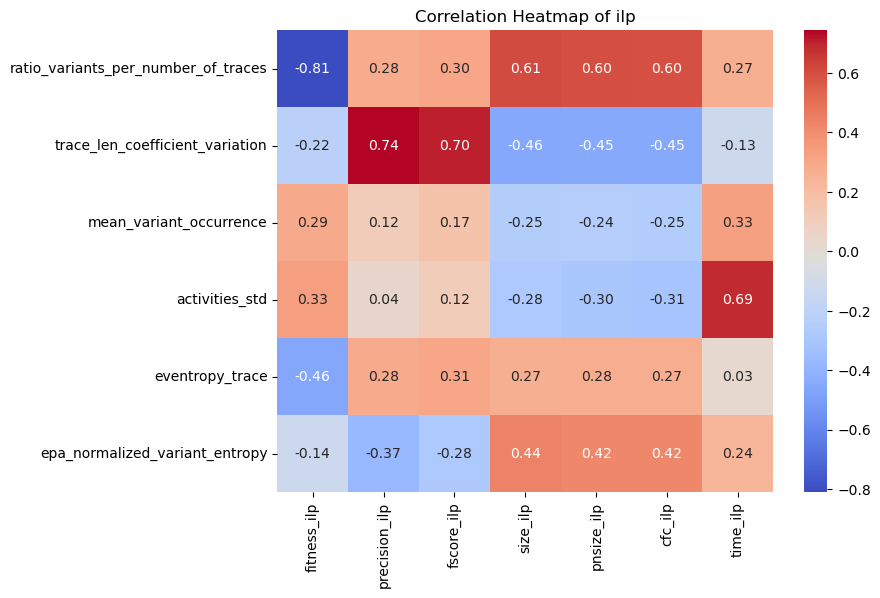

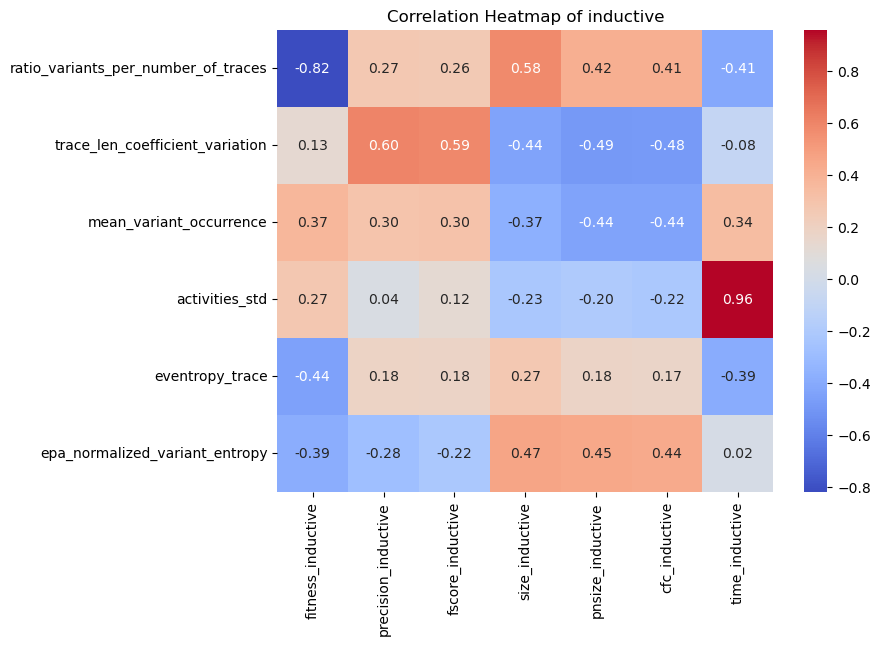

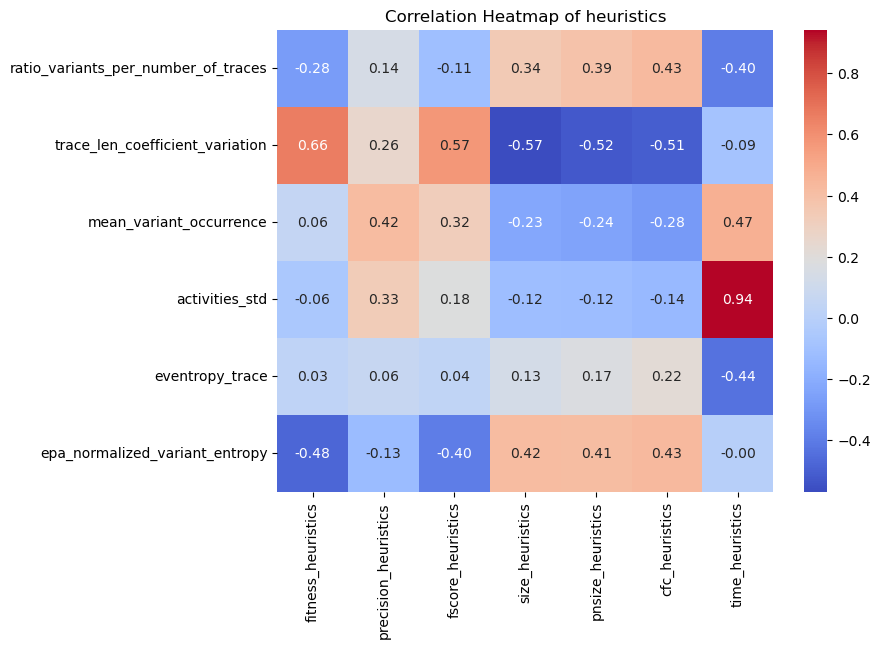

In [3]:
features = ["ratio_variants_per_number_of_traces","trace_len_coefficient_variation","mean_variant_occurrence","activities_std","eventropy_trace","epa_normalized_variant_entropy"]
miners_list = ["sm1","imf","ilp","inductive","heuristics"]
for miners in miners_list:
    miner_columns = ft_ben.filter(regex=miners).columns.tolist()
    df_plot = ft_ben[["log"]+features + miner_columns]



    # heatmaps


    cols_1 = [
        'ratio_variants_per_number_of_traces',
        'trace_len_coefficient_variation',
        'mean_variant_occurrence',
        'activities_std',
        'eventropy_trace',
        'epa_normalized_variant_entropy'
    ]

    cols_2 = [
        'fitness_'+miners,
        'precision_'+miners,
        'fscore_'+miners,
        'size_'+miners,
        'pnsize_'+miners,
        'cfc_'+miners,
        'time_'+miners,
    ]

    # Calculate correlation matrix between the two sets of columns
    corr_matrix = df_plot[cols_1 + cols_2].corr().loc[cols_1, cols_2]

    # Create the heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True,cmap="coolwarm",  fmt='.2f')
    plt.title('Correlation Heatmap of '+miners)
    plt.show()


#### Shap

In [7]:
# training
X = ft_ben[features]
y = ft_ben[[miner_columns[0]]].values #takes the fitness of the last miner in the loop

model = xgb.XGBRegressor()
# model = LinearRegression()
model.fit(X, y)

print("Model coefficients:\n")
for i in range(X.shape[1]):
    print(X.columns[i], "=", model.feature_importances_[i].round(4))
    

ypred = model.predict(X)

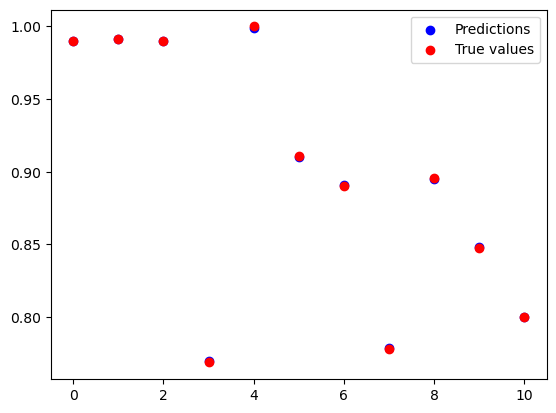

In [8]:
plt.scatter(range(len(ypred)), ypred, color='b', label='Predictions')
plt.scatter(range(len(y)), y, color='r', label='True values')
plt.legend()

In [9]:
# compute the SHAP values for the linear model
background = shap.maskers.Independent(X, max_samples=1000)
explainer = shap.Explainer(model.predict, background)
shap_values = explainer(X)


##### Waterfall plot (for individual predictions)

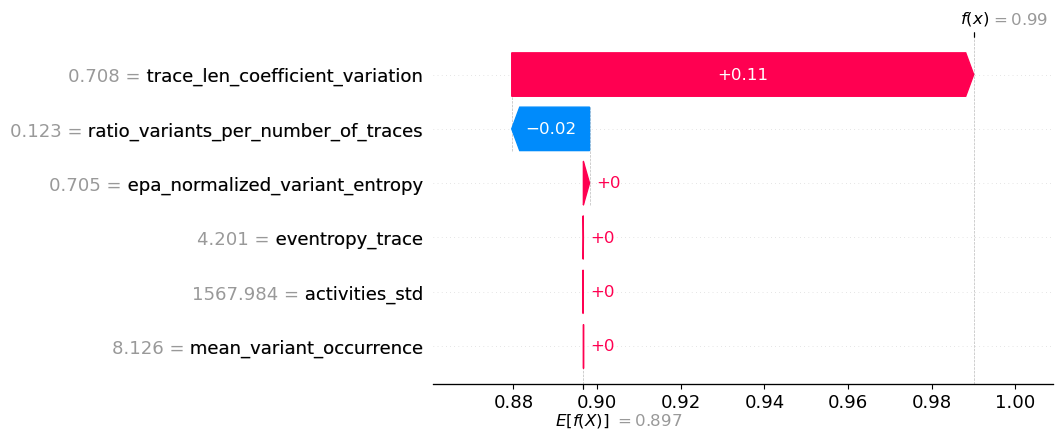

In [13]:
shap.plots.waterfall(shap_values[0], max_display=14)

##### Force Plot (for the whole dataset)

In [15]:
shap.initjs()
shap.plots.force(shap_values[0])


#### Stacked force plot(for the whole dataset)

In [16]:
shap.plots.force(shap_values[0:])

##### Absolute mean(for the whole dataset)

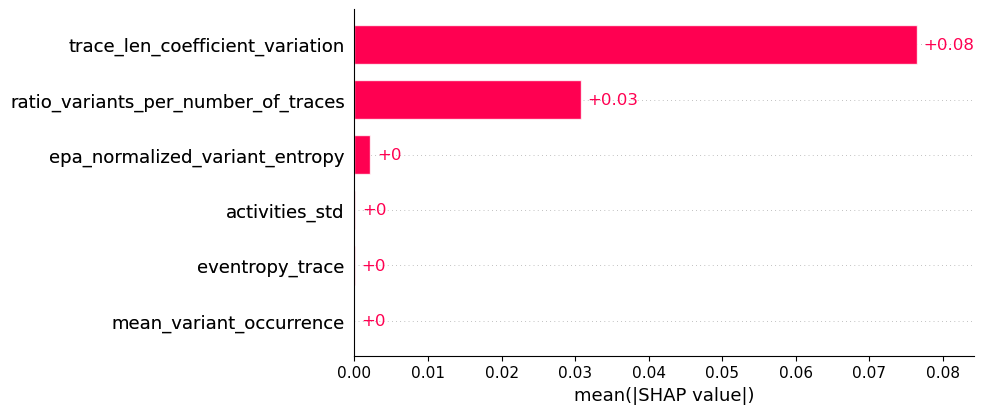

In [17]:
shap.plots.bar(shap_values)

##### Beeswarm plot(for the whole dataset)

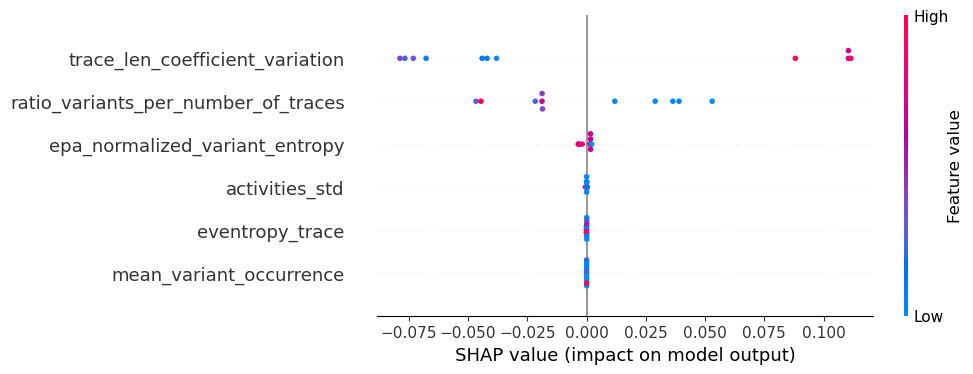

In [18]:
shap.plots.beeswarm(shap_values)